Nick Videtti \
IST 718 Big Data Analytics \
Lab 1 \
Summer 2023 \
\
This Lab will start with a data set containing football coach salaires for Football Bowl Subdivision (FBS) programs. Additional data will be collected for school graduation rate and school win/loss record. Data will be combined and cleaned into one Pandas DataFrame and further analysis, modeling, and interpretation will follow. \
\
The following topics will be considered. \
&nbsp;&nbsp;&nbsp;&nbsp;- Recommended salary for the Syracuse football coach \
&nbsp;&nbsp;&nbsp;&nbsp;- Predicted salary for the Syracuse football coach if Syracuse was in the Big East \
&nbsp;&nbsp;&nbsp;&nbsp;- Predicted salary for the Syracuse football coach if Syracuse was in the Big Ten \
&nbsp;&nbsp;&nbsp;&nbsp;- Schools to drop from dataset \
&nbsp;&nbsp;&nbsp;&nbsp;- Effect of graduation rate on predicted salary \
&nbsp;&nbsp;&nbsp;&nbsp;- Model Score/Accuracy \
&nbsp;&nbsp;&nbsp;&nbsp;- Feature with the biggest impact on salary size


First step is to read in the coaches data. This will be done by prompting the user to select a file, assuming that the coaches file is saved to their machine. The data will be read into a Pandas DataFrame.

In [302]:
#Read in Coaches data
import tkinter.filedialog
import pandas

#Open file dialog
coaches_path = tkinter.filedialog.askopenfile(title = 'Please Choose Coaches Data File...').name

#Read in data
coaches_data = pandas.read_csv(coaches_path)

#Print DataFrame
coaches_data

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"


Looks great! That said, nothing can be assumed about these data, especially the rows that were not printed above. Next, we will make sure that the "Conference" column is in a clean and consistent format.

In [303]:
list(coaches_data['Conference'].unique())

['Mt. West',
 'MAC',
 'SEC',
 'C-USA',
 'Sun Belt',
 'Pac-12',
 'Ind.',
 'Big 12',
 'ACC',
 'AAC',
 'Big Ten']

Looks good! Now, it will be important to distinguish between "Power 5" and Non-"Power 5" conferences, as the former has much higher prestige and more highly recruited players than the latter. This makes Power 5 / Non-Power 5 a great feature candidate for predicting coach salary. The Power 5 includes SEC, Pac-12, Big 12, ACC, and Big Ten. For fututre reference, Syracuse is in the ACC, and hence, the Power 5.

In [304]:
coaches_data['Power 5'] = [1 if conference in ('SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten') else 0 for conference in coaches_data['Conference']]

Next, we will read in data for the graduation rates. These data come from https://www.icpsr.umich.edu/web/ICPSR/studies/26801/summary and need to be downloaded to the user's machine as a tab-separated variables file. Then, just like the coaches data, a file dialog will pop up to prompt the user to select the appropriate data file and the data will be read into a Pandas DataFrame.

In [305]:
#Open file dialog
gsr_path = tkinter.filedialog.askopenfile(title = 'Please Choose Graduation Rates Data File...').name

#Read in Graduation Rate data
gsr_data = pandas.read_csv(gsr_path, delimiter = '\t')

#Print DataFrame
gsr_data

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_14,SCL_SUB_14,CONFNAME_14,D1_FB_CONF_14,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI
0,,100654,Alabama A&M University,20,Women's Bowling,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,1,1
1,,100654,Alabama A&M University,14,"Men's Track, Indoor",2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
2,,100654,Alabama A&M University,4,Football,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
3,,100654,Alabama A&M University,1,Baseball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,0,0,0,0,0,0,0,0,0,2
4,,100654,Alabama A&M University,19,Women's Basketball,2014,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,1,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,,433660,Florida Gulf Coast University,6,Men's Golf,2014,1,3,Atlantic Sun Conference,,...,0,0,0,0,0,0,0,0,0,2
6507,,433660,Florida Gulf Coast University,11,Men's Soccer,2014,1,3,Atlantic Sun Conference,,...,0,0,0,0,0,0,0,0,0,2
6508,,433660,Florida Gulf Coast University,36,Women's Volleyball,2014,1,3,Atlantic Sun Conference,,...,0,0,0,0,0,0,0,0,0,2
6509,,433660,Florida Gulf Coast University,1,Baseball,2014,1,3,Atlantic Sun Conference,,...,0,0,0,0,0,0,0,0,0,2


This is a very large data set that will not be used for much more than one column in the combined DataFrame. First, data will need to be filtered down to only incldue football. This looks to be in the "SPORT_NAME" column. We will need to ensure that formatting is clean and consistent in the column to catch all possible values corresponding to football.

In [306]:
list(gsr_data.sort_values('SPORT_NAME').SPORT_NAME.unique())

['Baseball',
 'Football',
 "Men's Basketball",
 "Men's Cross Country",
 "Men's Fencing",
 "Men's Golf",
 "Men's Gymnastics",
 "Men's Ice Hockey",
 "Men's Lacrosse",
 "Men's Skiing",
 "Men's Soccer",
 "Men's Swimming",
 "Men's Tennis",
 "Men's Track, Indoor",
 "Men's Track, Outdoor",
 "Men's Volleyball",
 "Men's Water Polo",
 "Men's Wrestling",
 'Mixed Rifle',
 "Women's Basketball",
 "Women's Bowling",
 "Women's Cross Country",
 "Women's Fencing",
 "Women's Field Hockey",
 "Women's Golf",
 "Women's Gymnastics",
 "Women's Ice Hockey",
 "Women's Lacrosse",
 "Women's Rowing",
 "Women's Skiing",
 "Women's Soccer",
 "Women's Softball",
 "Women's Swimming",
 "Women's Tennis",
 "Women's Track, Indoor",
 "Women's Track, Outdoor",
 "Women's Volleyball",
 "Women's Water Polo"]

It looks like "Football" is the only value that will need to be kept in the SPORT_NAME column. Graduation Rate data will be filtered to only football data and that result will be stored in a separate DataFrame. That separate DataFrame will then be joined with the coaches DataFrame to get the first instance of the combined DataFrame. It is possibe that rows may be lost if they do no have a matching school with each other and some row counts will be printed to track how prevalent that problem is.

In [307]:
football_gsr_data = gsr_data[gsr_data['SPORT_NAME'] == 'Football']

print('Rows in Coaches Data:', len(coaches_data.index))
print('Rows in Football Graduation Rate Data:', len(football_gsr_data.index))

data = coaches_data.merge(football_gsr_data, how = 'inner', left_on = 'School', right_on = 'SCL_NAME').reset_index(drop = True)

print('Rows in New Combined Data:', len(data.index))
print('Rows without a Matching School Name:', min(len(coaches_data.index), len(gsr_data.index)) - len(data.index))

data

Rows in Coaches Data: 129
Rows in Football Graduation Rate Data: 249
Rows in New Combined Data: 1
Rows without a Matching School Name: 128


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Power 5,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI
0,Boston College,ACC,Steve Addazio,"$2,514,859","$2,514,859",--,--,$0,--,1,...,1,1,0,0,0,0,0,1,1,2


It is seen that only Boston College had a match between the two data sets. Given some quick glances at each data set, it appears that "University" or "College" is not at the end of certain school names in the coaches data. The last word from each school name in the graduation rate data will be examined with the hope that it is always either "University" or "College". If this is the case, the all the data cleaning that should be needed to get matches is removing the last word from the school names in the graduation rate data, with the exception of Boston College. 

In [308]:
set(namelist[-1] for namelist in gsr_data['SCL_NAME'].str.split())

{'(Florida)',
 '(Ohio)',
 '(Pennsylvania)',
 'Academy',
 'Akron',
 'Alabama',
 'Albany',
 'American',
 'Amherst',
 'Anchorage',
 'Angeles',
 'Antonio',
 'Arizona',
 'Arkansas',
 'Arlington',
 'Asheville',
 'Augusta',
 'Austin',
 'Bakersfield',
 'Barbara',
 'Bay',
 'Berkeley',
 'Birmingham',
 'Bloomington',
 'Bluff',
 'Boulder',
 'Brooklyn',
 'Brunswick',
 'California',
 'Campus',
 'Carbondale',
 'Carolina)',
 'Champaign',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Christi',
 'Cincinnati',
 'Citadel',
 'Cities',
 'City',
 'College',
 'Colleges',
 'Colorado',
 'Columbia',
 'Connecticut',
 'County',
 'Cross',
 'Dakota',
 'Dame',
 'Davis',
 'Dayton',
 'Delaware',
 'Denver',
 'Diego',
 'Duluth',
 'Edwardsville',
 'Evansville',
 'Fairbanks',
 'Fayetteville',
 'Florida',
 'Francisco',
 'Fresno',
 'Fullerton',
 'Georgia',
 'Greensboro',
 'Hampshire',
 'Hartford',
 'Hill',
 'Houston',
 'Huntsville',
 'Idaho',
 'Indianapolis',
 'Institute',
 'Iowa',
 'Irvine',
 'Island',
 'Kansas',
 'Kentucky',

Well, that didn't work out quite as expected. Perhaps "University" or "College" exists in many different places within the school name. It is also possible that "University of" or "University at" exists in the school name. Both the coaches data and the graduation rate data will be examined to see how many rows of data have school names containing each of these phrases.

In [309]:
#Coaches Data where school has "college" in name
print('Rows in Coaches Data with "College" in School Column:', len(coaches_data[coaches_data['School'].str.upper().str.contains('COLLEGE')].index))
print()

#Coaches Data where school has "university" in name
print('Rows in Coaches Data with "University" in School Column:', len(coaches_data[coaches_data['School'].str.upper().str.contains('UNIVERSITY')].index))
print()

#Coaches Data where school has "university of" in name
print('Rows in Coaches Data with "University of" in School Column:', len(coaches_data[coaches_data['School'].str.upper().str.contains('UNIVERSITY OF')].index))
print()

#Coaches Data where school has "university at" in name
print('Rows in Coaches Data with "University at" in School Column:', len(coaches_data[coaches_data['School'].str.upper().str.contains('UNIVERSITY AT')].index))
print()

#Graduation Rate Data where school has "college" in name
print('Rows in Graduation Rate Data with "College" in SCL_NAME Column:', len(gsr_data[gsr_data['SCL_NAME'].str.upper().str.contains('COLLEGE')].index))
print()

#Graduation Rate Data where school has "university" in name
print('Rows in Graduation Rate Data with "University" in SCL_NAME Column:', len(gsr_data[gsr_data['SCL_NAME'].str.upper().str.contains('UNIVERSITY')].index))
print()

#Graduation Rate Data where school has "university of" in name
print('Rows in Graduation Rate Data with "University of" in SCL_NAME Column:', len(gsr_data[gsr_data['SCL_NAME'].str.upper().str.contains('UNIVERSITY OF')].index))
print()

#Graduation Rate Data where school has "university at" in name
print('Rows in Graduation Rate Data with "University at" in SCL_NAME Column:', len(gsr_data[gsr_data['SCL_NAME'].str.upper().str.contains('UNIVERSITY AT')].index))

Rows in Coaches Data with "College" in School Column: 1

Rows in Coaches Data with "University" in School Column: 0

Rows in Coaches Data with "University of" in School Column: 0

Rows in Coaches Data with "University at" in School Column: 0

Rows in Graduation Rate Data with "College" in SCL_NAME Column: 442

Rows in Graduation Rate Data with "University" in SCL_NAME Column: 5984

Rows in Graduation Rate Data with "University of" in SCL_NAME Column: 2009

Rows in Graduation Rate Data with "University at" in SCL_NAME Column: 75


It seems like only one row of data in the coaches data contains these phrases, but these phrases are extremely prevalent in the graduation rate data. These phrases will need to be removed from the school names in the graduation rate data, with the excpetion of the one example in the coaches data that has "College". This should be "Boston College", as we saw earlier.

In [310]:
coaches_data[coaches_data['School'].str.upper().str.contains('COLLEGE')]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Power 5
14,Boston College,ACC,Steve Addazio,"$2,514,859","$2,514,859",--,--,$0,--,1


It is indeed Boston College! So, with the exception of Boston College, the phrases "University", "University at", "University of", and "College" will need to be removed from the school names in the graudation rate data. Once this is done, we will try again to join the coaches data to the graduation rate data and see how many matches there are.

In [311]:
coaches_data['SCHOOL'] = coaches_data['School'].str.upper().str.strip()

gsr_data['SCHOOL_NAME_ADJ'] = gsr_data['SCL_NAME'].str.upper().str.strip()
gsr_data['SCHOOL_NAME_ADJ'] = [school if school == 'BOSTON COLLEGE' else school.replace('UNIVERSITY OF', '') \
    .replace('UNIVERSITY AT', '').replace('UNIVERSITY', '').replace('COLLEGE', '').strip() for school in gsr_data['SCHOOL_NAME_ADJ']]

football_gsr_data = gsr_data[gsr_data['SPORT_NAME'] == 'Football']

print('Rows in Coaches Data:', len(coaches_data.index))
print('Rows in Football Graduation Rate Data:', len(football_gsr_data.index))

data = coaches_data.merge(football_gsr_data, how = 'inner', left_on = 'SCHOOL', right_on = 'SCHOOL_NAME_ADJ').reset_index(drop = True)

print('Rows in New Combined Data:', len(data.index))
print('Rows without a Matching School Name:', min(len(coaches_data.index), len(gsr_data.index)) - len(data.index))

data

Rows in Coaches Data: 129
Rows in Football Graduation Rate Data: 249
Rows in New Combined Data: 86
Rows without a Matching School Name: 43


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Power 5,...,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,RAW_OR_CI,SCHOOL_NAME_ADJ
0,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500",0,...,0,0,0,0,0,0,0,0,2,AKRON
1,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000",1,...,1,0,0,0,0,0,0,0,2,ALABAMA
2,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417",0,...,0,1,0,0,0,0,0,0,2,APPALACHIAN STATE
3,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000",1,...,0,0,0,0,0,0,0,0,2,ARIZONA
4,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667",1,...,0,0,0,0,0,0,0,0,2,ARIZONA STATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Washington State,Pac-12,Mike Leach,"$3,500,000","$3,500,000","$725,000","$75,000",$0,"$4,900,000",1,...,0,0,0,0,0,0,0,0,2,WASHINGTON STATE
82,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000",1,...,0,0,0,0,0,0,0,0,2,WEST VIRGINIA
83,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000",0,...,0,0,0,0,0,0,0,0,2,WESTERN KENTUCKY
84,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000",0,...,0,0,0,0,0,0,0,0,2,WESTERN MICHIGAN


Sadly, 43 of the 129 schools still did not have a match. At this point, the will need to be excluded from combined data. Also, any values where salary is null or 0 will need to be exculded. \
\
That said, it is also time to finally reduce down columns and really narrow down to just the features of interest. This will also make the results of joining of the additional data sets seem a little less overwhelming. The columns to keep will be school name, graduation rate, conference, power 5, salary, and Max Spending. Salary will be the "SchoolPay" column. Max Spending will be the most a school could potentially spend on a coach in that given year by summing "SchoolPay", "Bonus", and "Buyout". Graduation Rate will be the "MULTIYR_APR_RATE_1000_RAW" column from the graduation rate data.

In [312]:
data['Salary'] = data['SchoolPay'].str.slice(start = 1).str.replace(',','').str.replace('-','0').astype(int)
data['Bonus'] = data['Bonus'].str.slice(start = 1).str.replace(',','').str.replace('-','0').astype(int)
data['Buyout'] = data['Buyout'].str.slice(start = 1).str.replace(',','').str.replace('-','0').astype(int)

data['Max Spending'] = data['Salary'] + data['Bonus'] + data['Buyout']
data['Graduation Rate'] = ['{:,.1%}'.format(rate/1000) for rate in data['MULTIYR_APR_RATE_1000_RAW']]

data = data[['SCHOOL', 'Graduation Rate', 'Conference', 'Power 5', 'Salary', 'Max Spending']]

data = data[data['Salary'] > 0]

data

,SCHOOL,Graduation Rate,Conference,Power 5,Salary,Max Spending
0,AKRON,94.7%,MAC,0,411000,1324500
1,ALABAMA,97.8%,SEC,1,8307000,43007000
2,APPALACHIAN STATE,96.0%,Sun Belt,0,712500,3167917
3,ARIZONA,96.1%,Pac-12,1,1600000,13625000
4,ARIZONA STATE,94.9%,Pac-12,1,2000000,13176667
...,...,...,...,...,...,...
81,WASHINGTON STATE,95.1%,Pac-12,1,3500000,9125000
82,WEST VIRGINIA,94.2%,Big 12,1,3605000,11755000
83,WESTERN KENTUCKY,94.7%,C-USA,0,800000,2400000
84,WESTERN MICHIGAN,95.5%,MAC,0,800000,1946500


Next step is to get each school's win/loss record from last season (2022) incldued in the data. The data for this were obtained at https://www.sports-reference.com/cfb/years/2022-standings.html and were copied and pasted into a CSV file. These data will be read into a DataFrame the same way the other two data sets were read in. The user will be prompted with a file dialog to select the data file, then data will be read. into a Pandas DataFrame.

In [313]:
#Open file dialog
winloss_path = tkinter.filedialog.askopenfile(title = 'Please Choose Win/Loss Data File...').name

#Read in Win/Loss data
winloss_data = pandas.read_csv(winloss_path)

#Print DataFrame
winloss_data

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,Def,SRS,SOS,AP Pre,AP High,AP Post,Notes
0,1,Clemson,ACC (Atlantic),11,3,0.786,8.0,0.0,1.000,33.2,20.9,13.59,3.30,4.0,4.0,13.0,NaN
1,2,Florida State,ACC (Atlantic),10,3,0.769,5.0,3.0,0.625,36.1,20.6,14.77,3.38,NaN,11.0,11.0,NaN
2,3,Louisville,ACC (Atlantic),8,5,0.615,4.0,4.0,0.500,26.9,19.2,10.44,4.59,NaN,NaN,NaN,NaN
3,4,North Carolina State,ACC (Atlantic),8,5,0.615,4.0,4.0,0.500,24.3,19.2,6.75,3.36,13.0,10.0,NaN,NaN
4,5,Syracuse,ACC (Atlantic),7,6,0.538,4.0,4.0,0.500,27.7,23.1,6.41,3.80,NaN,14.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,Southern Mississippi,Sun Belt (West),7,6,0.538,4.0,4.0,0.500,25.3,23.5,-3.89,-3.81,NaN,NaN,NaN,NaN
127,128,Louisiana,Sun Belt (West),6,7,0.462,4.0,4.0,0.500,26.2,22.8,-0.50,-3.19,NaN,NaN,NaN,NaN
128,129,Louisiana-Monroe,Sun Belt (West),4,8,0.333,3.0,5.0,0.375,22.3,34.4,-7.81,-0.64,NaN,NaN,NaN,NaN
129,130,Texas State,Sun Belt (West),4,8,0.333,2.0,6.0,0.250,21.1,26.3,-10.04,-4.46,NaN,NaN,NaN,NaN


Before joining this DataFrame to the main combined DataFrame, first the school names will need to be capitalized in order to get matches. Luckily, it appears that none of these schools have "University", "College", "University of", or "University at" in their names. First, we will ensure that this is the case, then we will create a new column for the cpaitalized school names.

In [314]:
#Win/Loss Data where school has "college" in name
print('Rows in Win/Loss Data with "College" in School Column:', len(winloss_data[winloss_data['School'].str.upper().str.contains('COLLEGE')].index))
print()

#Win/Loss Data where school has "university" in name
print('Rows in Win/Loss Data with "University" in School Column:', len(winloss_data[winloss_data['School'].str.upper().str.contains('UNIVERSITY')].index))
print()

#Win/Loss Data where school has "university of" in name
print('Rows in Win/Loss Data with "University of" in School Column:', len(winloss_data[winloss_data['School'].str.upper().str.contains('UNIVERSITY OF')].index))
print()

#Win/Loss Data where school has "university at" in name
print('Rows in Win/Loss Data with "University at" in School Column:', len(winloss_data[winloss_data['School'].str.upper().str.contains('UNIVERSITY AT')].index))

Rows in Win/Loss Data with "College" in School Column: 1

Rows in Win/Loss Data with "University" in School Column: 0

Rows in Win/Loss Data with "University of" in School Column: 0

Rows in Win/Loss Data with "University at" in School Column: 0


Only one row with any of the phrases! Specifically, this one had "College" in it. This is probably Boston College...

In [315]:
winloss_data[winloss_data['School'].str.upper().str.contains('COLLEGE')]

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,Def,SRS,SOS,AP Pre,AP High,AP Post,Notes
6,7,Boston College,ACC (Atlantic),3,9,0.25,2.0,6.0,0.25,17.8,30.3,-5.67,3.58,NaN,NaN,NaN,NaN


And it is Boston College! Now, time to capitlize the school names, join the data, and see how many matches there are. The only columns from the Win / Loss data that will be joined in are "Rk", "W", "L", and "Pct". These will be renamed to "WinLoss_Rank_2022", "Wins_2022", "Losses_2022", and "Win_Percentage_2022".

In [316]:
winloss_data['SCHOOL'] = winloss_data['School'].str.upper().str.strip()

before_rows = len(data.index)
print('Rows in Win/Loss Data:', len(winloss_data.index))
print('Rows in Combined Data Before Join:', before_rows)

data = data.merge(winloss_data[['SCHOOL', 'Rk', 'W', 'L', 'Pct']], how = 'inner', left_on = 'SCHOOL', right_on = 'SCHOOL').set_index('SCHOOL')

data = data.rename(columns = {'Rk': 'WinLoss_Rank_2022', 'W': 'Wins_2022', 'L': 'Losses_2022', 'Pct': 'Win_Percentage_2022'})

data['Win_Percentage_2022'] = ['{:,.1%}'.format(value) for value in data['Win_Percentage_2022']]

print('Rows in Combined Data After Join:', len(data.index))
print('Rows without a Matching School Name:', min(before_rows, len(winloss_data.index)) - len(data.index))

data

Rows in Win/Loss Data: 131
Rows in Combined Data Before Join: 82
Rows in Combined Data After Join: 78
Rows without a Matching School Name: 4


,Graduation Rate,Conference,Power 5,Salary,Max Spending,WinLoss_Rank_2022,Wins_2022,Losses_2022,Win_Percentage_2022
SCHOOL,,,,,,,,,
AKRON,94.7%,MAC,0,411000,1324500,73,2,10,16.7%
ALABAMA,97.8%,SEC,1,8307000,43007000,111,11,2,84.6%
APPALACHIAN STATE,96.0%,Sun Belt,0,712500,3167917,121,6,6,50.0%
ARIZONA,96.1%,Pac-12,1,1600000,13625000,99,5,7,41.7%
ARIZONA STATE,94.9%,Pac-12,1,2000000,13176667,101,3,9,25.0%
...,...,...,...,...,...,...,...,...,...
WASHINGTON STATE,95.1%,Pac-12,1,3500000,9125000,98,7,6,53.8%
WEST VIRGINIA,94.2%,Big 12,1,3605000,11755000,34,5,7,41.7%
WESTERN KENTUCKY,94.7%,C-USA,0,800000,2400000,50,9,5,64.3%


Only 4 rows excluded, not bad at all! Now it is time for some good old fashioned Exploratory Data Analysis for the 78 remining schools!!

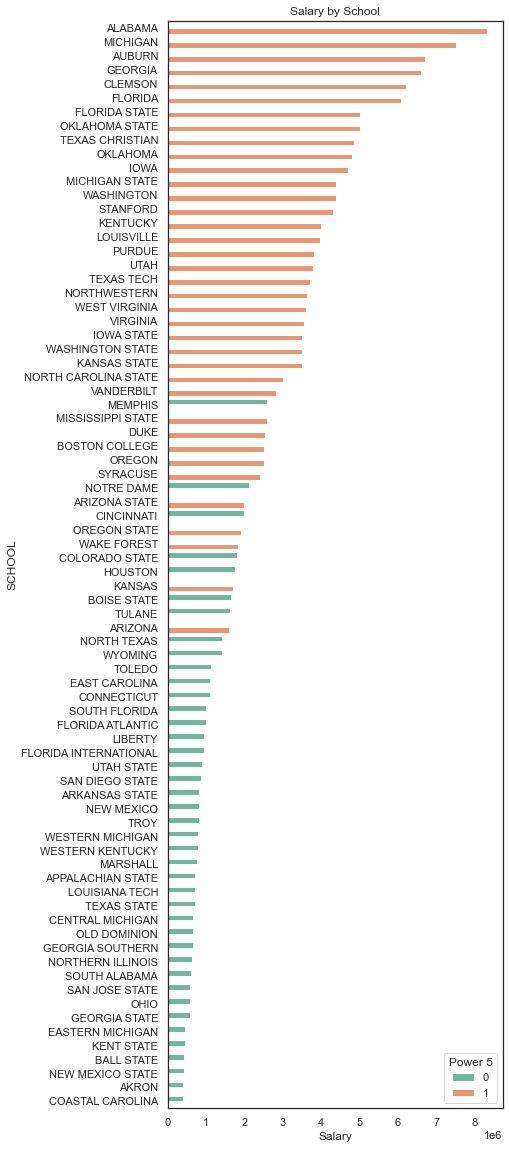

In [317]:
import seaborn
from matplotlib import pyplot

pyplot.figure().set_figheight(20)
seaborn.barplot(data = data.sort_values('Salary', ascending = False), x = 'Salary', y = data.sort_values('Salary', ascending = False).index, hue = 'Power 5')
pyplot.title('Salary by School')
pyplot.show()

It is pretty clear here that a school being in the "Power 5" results in much higher coach salaries. Let's see if it is the same with Max Spending.

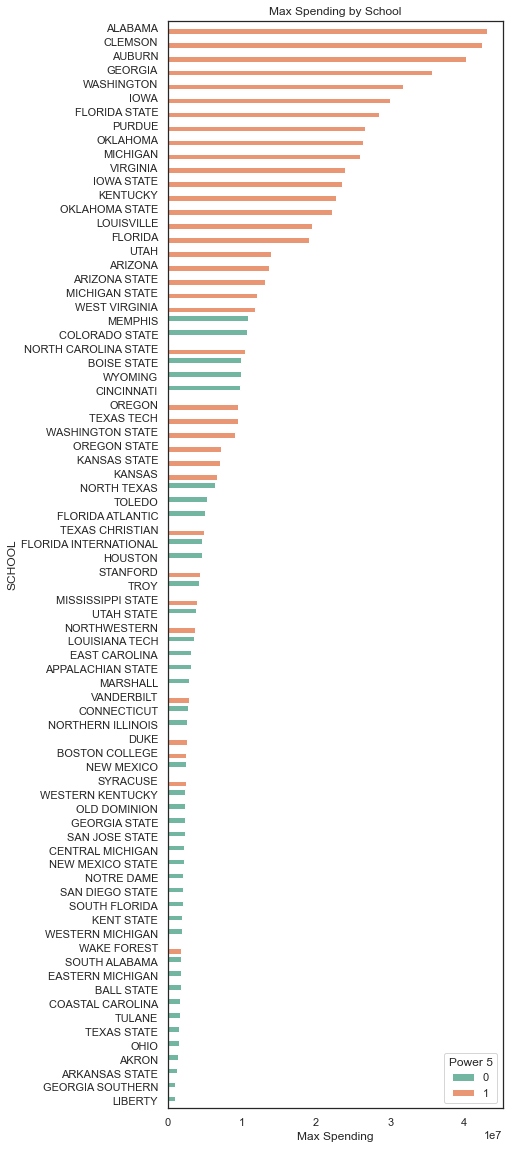

In [318]:
pyplot.figure().set_figheight(20)
seaborn.barplot(data = data.sort_values('Max Spending', ascending = False), x = 'Max Spending', y = data.sort_values('Max Spending', ascending = False).index, hue = 'Power 5')
pyplot.title('Max Spending by School')
pyplot.show()

While not quite as impactful as the effect on salary, a school being in the "Power 5" seems to very much affect Max Spending as well.

Now, it's time to investigate more into the Power 5 schools. How many schools are there vs Non-Power 5? How are total salary and total max spending comparitively between the two groups? Which of the two group won more games? The pie charts that follow will give answers to these questions.

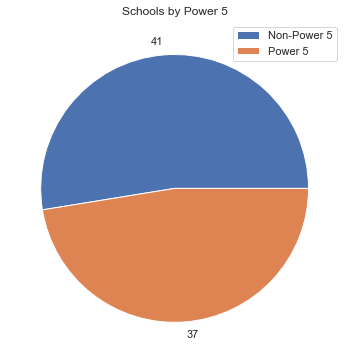

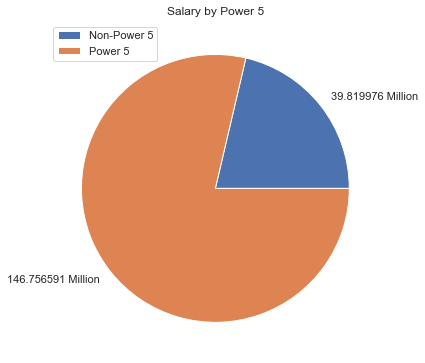

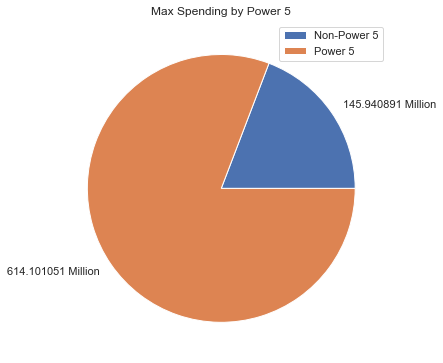

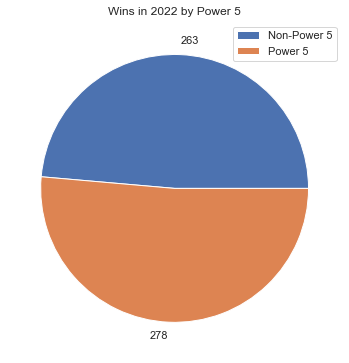

In [319]:
#Aggregate data for pie charts
p5_pie_data = data[['Power 5', 'Salary', 'Max Spending', 'Wins_2022', 'WinLoss_Rank_2022']].groupby('Power 5') \
    .aggregate({'Salary': 'sum', 'Max Spending': 'sum', 'Wins_2022': 'sum', 'WinLoss_Rank_2022': 'count'})

p5_pie_data = p5_pie_data.rename(columns = {'WinLoss_Rank_2022': 'Schools'})

#Set background white
seaborn.set_theme(style = 'white')

#Schools by Power 5 Pie Chart
pyplot.figure().set_figheight(100)
pyplot.pie(p5_pie_data['Schools'], labels = p5_pie_data['Schools'])
pyplot.title('Schools by Power 5')
pyplot.legend(['Power 5' if index == 1 else 'Non-Power 5' for index in p5_pie_data.index])
pyplot.show()

#Salary by Power 5 Pie Chart
pyplot.figure().set_figheight(100)
pyplot.pie(p5_pie_data['Salary'], labels = (p5_pie_data['Salary']/1000000).astype(str)+' Million')
pyplot.title('Salary by Power 5')
pyplot.legend(['Power 5' if index == 1 else 'Non-Power 5' for index in p5_pie_data.index])
pyplot.show()

#Max Spending by Power 5 Pie Chart
pyplot.figure().set_figheight(100)
pyplot.pie(p5_pie_data['Max Spending'], labels = (p5_pie_data['Max Spending']/1000000).astype(str)+' Million')
pyplot.title('Max Spending by Power 5')
pyplot.legend(['Power 5' if index == 1 else 'Non-Power 5' for index in p5_pie_data.index])
pyplot.show()

#Wins_2022 by Power 5 Pie Chart
pyplot.figure().set_figheight(100)
pyplot.pie(p5_pie_data['Wins_2022'], labels = p5_pie_data['Wins_2022'])
pyplot.title('Wins in 2022 by Power 5')
pyplot.legend(['Power 5' if index == 1 else 'Non-Power 5' for index in p5_pie_data.index])
pyplot.show()

Those charts are very telling. While there are more schools in the "Non-Power 5" group, the "Power 5" group accounts for the vast majority of both total salary and total max spending. The "Power 5" group did have slightly more wins, but not anywhere near enough more to justify the imparity of salary and max spending.

Let's dive a bit deeper by looking breakding down the same measures, but this time using the school's conference rather than Power 5 / Non-Power 5. Due to a much larger number of categories, bar charts will be used rather than pie charts.

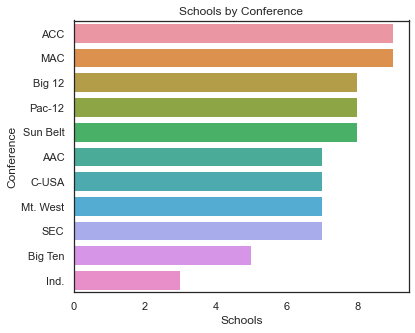

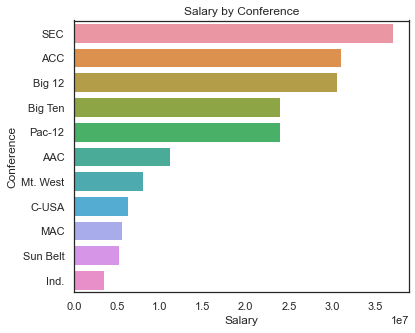

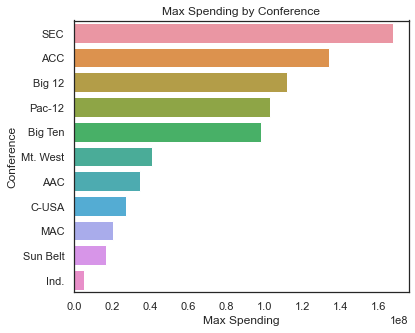

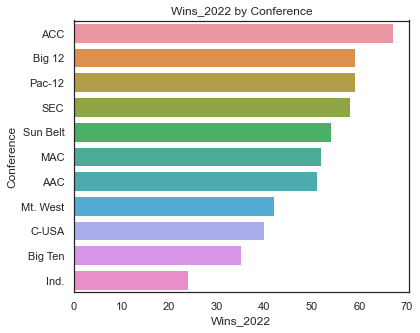

In [320]:
#Aggregate data for bar charts
conf_bar_data = data[['Conference', 'Salary', 'Max Spending', 'Wins_2022', 'WinLoss_Rank_2022']].groupby('Conference') \
    .aggregate({'Salary': 'sum', 'Max Spending': 'sum', 'Wins_2022': 'sum', 'WinLoss_Rank_2022': 'count'})

conf_bar_data = conf_bar_data.rename(columns = {'WinLoss_Rank_2022': 'Schools'})

#Set background white
seaborn.set_theme(style = 'white')

#Schools by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_bar_data.sort_values('Schools', ascending = False), x = 'Schools', y = conf_bar_data.sort_values('Schools', ascending = False).index)
pyplot.title('Schools by Conference')
pyplot.show()

#Salary by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_bar_data.sort_values('Salary', ascending = False), x = 'Salary', y = conf_bar_data.sort_values('Salary', ascending = False).index)
pyplot.title('Salary by Conference')
pyplot.show()

#Max Spending by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_bar_data.sort_values('Max Spending', ascending = False), x = 'Max Spending', y = conf_bar_data.sort_values('Max Spending', ascending = False).index)
pyplot.title('Max Spending by Conference')
pyplot.show()

#Wins_2022 by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_bar_data.sort_values('Wins_2022', ascending = False), x = 'Wins_2022', y = conf_bar_data.sort_values('Wins_2022', ascending = False).index)
pyplot.title('Wins_2022 by Conference')
pyplot.show()

These results ought to be taken with a grain of salt as we see there is a wide range in the number of schools in each conference, which could skew total salary, total max spending, and total wins. That said, it still seems that Power 5 (ACC, Big 12, Pac-12, SEC, and Big Ten) has a clearly higher total salary and total max spending than Non-Power 5, regardless of conference. 

There could be many reasons for this, one being more successful teams in the Power 5. To normalize, we will look at win percentage rather than raw number of wins. The results will be shown in bar graphs for both confernces and for Power 5 / Non-Power 5.

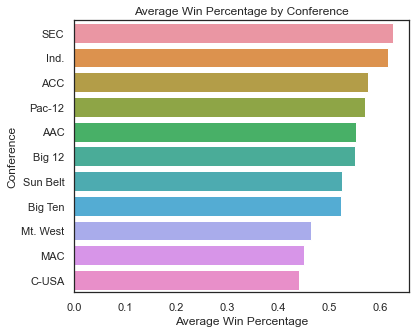

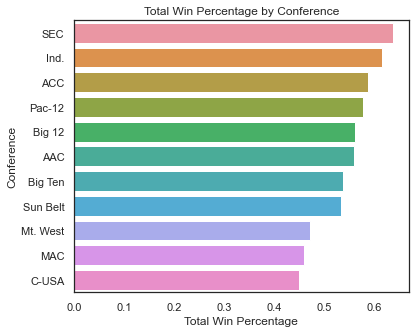

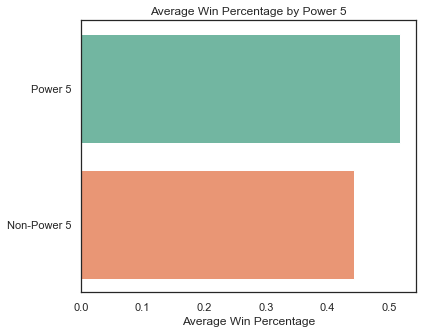

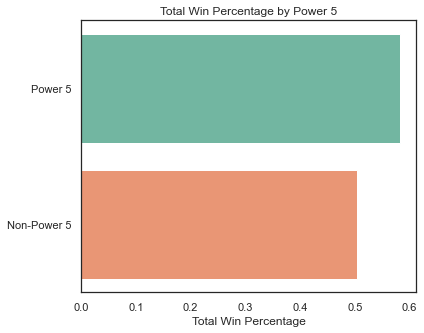

In [321]:
#Aggregate data for win/loss metric charts by conference
conf_winloss_data = data
conf_winloss_data['Win_Percentage_2022'] = conf_winloss_data['Win_Percentage_2022'].astype(str).str.replace('%','').str.replace('.','').astype(int) / 1000
conf_winloss_data = conf_winloss_data[['Conference', 'Wins_2022', 'Losses_2022', 'Win_Percentage_2022']].groupby('Conference') \
    .aggregate({'Wins_2022': 'sum', 'Losses_2022': 'sum', 'Win_Percentage_2022': 'mean'})

#Transformations on aggregated win/loss data for conferences
conf_winloss_data = conf_winloss_data.rename(columns = {'Win_Percentage_2022': 'Average Win Percentage'})
conf_winloss_data['Total Win Percentage'] = conf_winloss_data['Wins_2022'] / (conf_winloss_data['Wins_2022'] + conf_winloss_data['Losses_2022']) 
conf_winloss_data = conf_winloss_data.drop(columns = ['Wins_2022', 'Losses_2022'])

#Aggregate data for win/loss metric charts by Power 5
p5_winloss_data = data
p5_winloss_data['Win_Percentage_2022'] = p5_winloss_data['Win_Percentage_2022'].astype(str).str.replace('%','').str.replace('.','').astype(int) / 1000
p5_winloss_data['Power 5'] = p5_winloss_data['Power 5'].astype(str).str.replace('1','Power 5').str.replace('0','Non-Power 5')
p5_winloss_data = p5_winloss_data[['Power 5', 'Wins_2022', 'Losses_2022', 'Win_Percentage_2022']].groupby('Power 5') \
    .aggregate({'Wins_2022': 'sum', 'Losses_2022': 'sum', 'Win_Percentage_2022': 'mean'})

#Transformations on aggregated win/loss data for power 5
p5_winloss_data = p5_winloss_data.rename(columns = {'Win_Percentage_2022': 'Average Win Percentage'})
p5_winloss_data['Total Win Percentage'] = p5_winloss_data['Wins_2022'] / (p5_winloss_data['Wins_2022'] + p5_winloss_data['Losses_2022']) 
p5_winloss_data = p5_winloss_data.drop(columns = ['Wins_2022', 'Losses_2022'])

#Set background white
seaborn.set_theme(style = 'white')

#Schools by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_winloss_data.sort_values('Average Win Percentage', ascending = False), x = 'Average Win Percentage', y = conf_winloss_data.sort_values('Average Win Percentage', ascending = False).index)
pyplot.title('Average Win Percentage by Conference')
pyplot.show()

#Salary by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = conf_winloss_data.sort_values('Total Win Percentage', ascending = False), x = 'Total Win Percentage', y = conf_winloss_data.sort_values('Total Win Percentage', ascending = False).index)
pyplot.title('Total Win Percentage by Conference')
pyplot.show()

#Max Spending by Conference Bar Chart
seaborn.set_palette('Set2')
pyplot.figure().set_figheight(5)
seaborn.barplot(data = p5_winloss_data.sort_values('Average Win Percentage', ascending = False), x = 'Average Win Percentage', y = p5_winloss_data.sort_values('Average Win Percentage', ascending = False).index.astype(str))
pyplot.title('Average Win Percentage by Power 5')
pyplot.ylabel('')
pyplot.show()

#Wins_2022 by Conference Bar Chart
pyplot.figure().set_figheight(5)
seaborn.barplot(data = p5_winloss_data.sort_values('Total Win Percentage', ascending = False), x = 'Total Win Percentage', y = p5_winloss_data.sort_values('Total Win Percentage', ascending = False).index)
pyplot.title('Total Win Percentage by Power 5')
pyplot.ylabel('')
pyplot.show()

seaborn.set_palette(seaborn.color_palette())

Power 5 conferences do generally, overall, and on average have higher win percentages than Non-Power 5 schools. This could be due to many factors such as the fact that the two groups play each other sometimes and Power 5 almost always wins. These wins could be what is making the difference. 

Now, let's take a look at all numerical data and see if any fields correlate well with each other. Below a correlation plot will be generated and displayed.

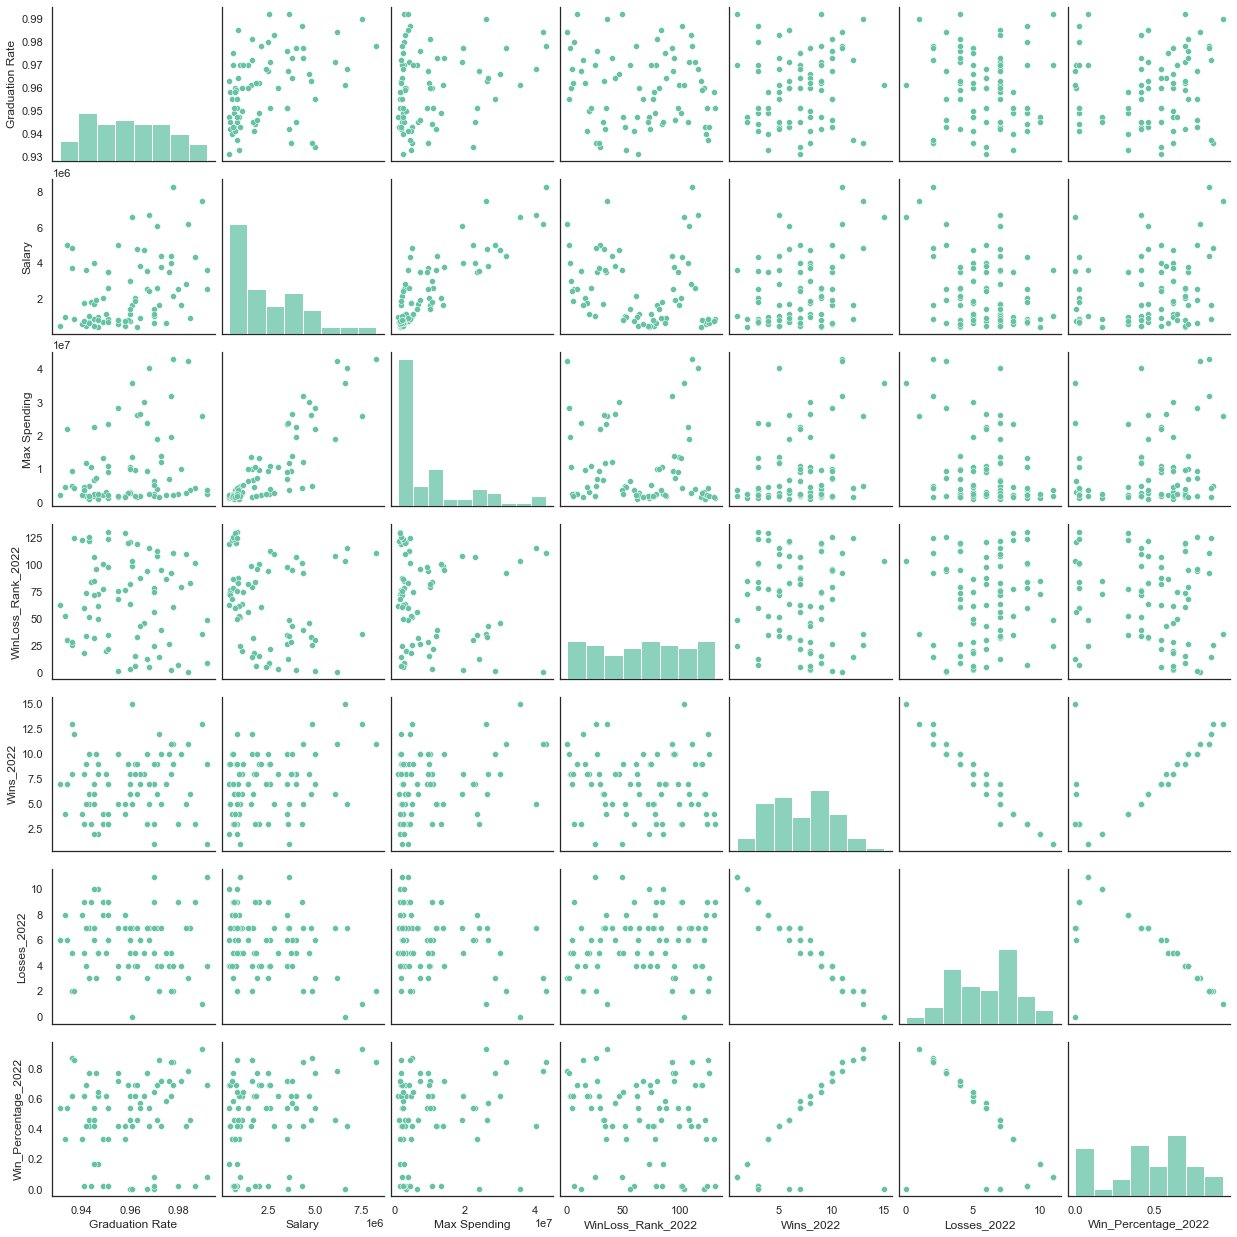

In [322]:
#Transform variables from percentages back to numerical values
data['Graduation Rate'] = data['Graduation Rate'].astype(str).str.replace('%','').str.replace('.','').astype(int) / 1000
data['Win_Percentage_2022'] = data['Win_Percentage_2022'].astype(str).str.replace('%','').str.replace('.','').astype(int) / 1000

seaborn.pairplot(data)

At a quick glance, no obvious pairs stand out with the exception of the obvious-and-not-so-helpful (Salary with Max Spending, Wins with Losses, etc.)

Let's narrow down to just graduation rate and win percentage to see if either of those stand out in their correlation with salary and max spending.

<AxesSubplot:>

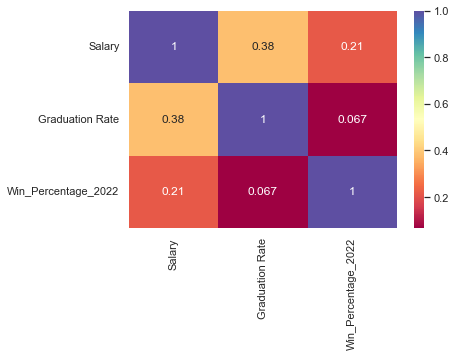

In [323]:
seaborn.heatmap(data[['Salary', 'Graduation Rate', 'Win_Percentage_2022']].corr(), annot = True, cmap = 'Spectral')

<AxesSubplot:>

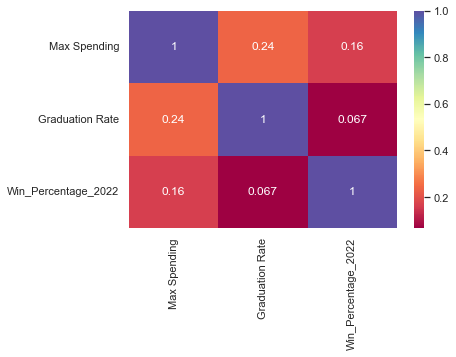

In [324]:
seaborn.heatmap(data[['Max Spending', 'Graduation Rate', 'Win_Percentage_2022']].corr(), annot = True, cmap = 'Spectral')

The strongest correlations appear to be with graduation rate, but they are still not very strong and do not appear to be as impactful as the categorical variables (conference and Power 5 / Non-Power 5).

Enough with speculation! It is time to build a model! Results will be stored in the same DataFrame that is used to train and test. This will be possible using cross validation where the predictions from each fold will be joined to the input DataFrame. These results will then be used to compare the actual values with the predicted values. The algorithm used will be ordinary least squares regression.

In [325]:
#Column names without whitespace are easier to work with
data.columns = [column.replace(' ','_') for column in data.columns]

#5-fold Cross validation function - NOT VERY VERSATILE IN TERMS OF POTENTIAL FOR USE OUTSIDE THE SCOPE OF THIS PROJECT AND THIS DATAFRAME
def model(data, pred_cols):
    import statsmodels.formula.api
    import math

    while 1 == 1:
        try:
            data = data.sample(frac = 1)

            fivefold_indices = [0, \
                math.floor(len(data) / 5), \
                (math.floor(len(data) / 5))*2, \
                (math.floor(len(data) / 5))*3, \
                (math.floor(len(data) / 5))*4]

            for fold in range(5):
                if fold == 4: test = data.iloc[fivefold_indices[fold] : ]
                else: test = data.iloc[fivefold_indices[fold] : fivefold_indices[fold + 1]]

                if fold == 0: train = data.iloc[ : fivefold_indices[fold+1]]
                elif fold == 4: data.iloc[fivefold_indices[fold] : ]
                else: train = data.iloc[fivefold_indices[fold] : fivefold_indices[fold + 1]]

                salary_model = statsmodels.formula.api.ols('Salary ~ ' + data.columns[0] + ''.join([' + ' + column for column in pred_cols]), data = train).fit()
                if fold == 0: predict_salary = salary_model.predict(test)
                else: predict_salary = pandas.concat([predict_salary, salary_model.predict(test)])

                maxspending_model = statsmodels.formula.api.ols('Max_Spending ~ ' + data.columns[0] + ''.join([' + ' + column for column in pred_cols]), data = train).fit()
                if fold == 0: predict_maxspending = maxspending_model.predict(test)
                else: predict_maxspending = pandas.concat([predict_maxspending, maxspending_model.predict(test)])

            break
        
        except: pass
    
    #Join predictions to input DataFrame
    data = data.merge(predict_salary.to_frame(name = 'predict_salary'), how = 'left', left_index = True, right_index = True) \
        .merge(predict_maxspending.to_frame(name = 'predict_maxspending'), how = 'left', left_index = True, right_index = True)

    return(data.sort_values(data.index.name))

#Run function on DataFrame using all columns except for Salary and Max_Spending
data = model(data, ['Graduation_Rate', 'Conference', 'Power_5', 'WinLoss_Rank_2022', 'Wins_2022', 'Losses_2022', 'Win_Percentage_2022'])

#Print resulting DataFrame with predictions
data

,Graduation_Rate,Conference,Power_5,Salary,Max_Spending,WinLoss_Rank_2022,Wins_2022,Losses_2022,Win_Percentage_2022,predict_salary,predict_maxspending
SCHOOL,,,,,,,,,,,
AKRON,0.947,MAC,Non-Power 5,411000,1324500,73,2,10,0.167,4.110000e+05,1.324500e+06
ALABAMA,0.978,SEC,Power 5,8307000,43007000,111,11,2,0.846,1.125431e+07,4.752055e+07
APPALACHIAN STATE,0.960,Sun Belt,Non-Power 5,712500,3167917,121,6,6,0.005,5.167419e+06,3.129289e+07
ARIZONA,0.961,Pac-12,Power 5,1600000,13625000,99,5,7,0.417,1.751778e+06,1.232681e+07
ARIZONA STATE,0.949,Pac-12,Power 5,2000000,13176667,101,3,9,0.025,1.987309e+06,1.328517e+07
...,...,...,...,...,...,...,...,...,...,...,...
WASHINGTON STATE,0.951,Pac-12,Power 5,3500000,9125000,98,7,6,0.538,3.500000e+06,9.125000e+06
WEST VIRGINIA,0.942,Big 12,Power 5,3605000,11755000,34,5,7,0.417,3.605000e+06,1.175500e+07
WESTERN KENTUCKY,0.947,C-USA,Non-Power 5,800000,2400000,50,9,5,0.643,8.000000e+05,2.400000e+06


Not a great model at first glance. Some values appear to be exact or near-exact matches, while others are large negative values. No matter how bad a season any school has, their coach is unlikely to be the one paying the school six figures.

Now it is time to dive deep into the model results! First, by looking at how predicted values compare to actual values by plotting both in a scatterplot. This will be done for both Salary and Max Spending.

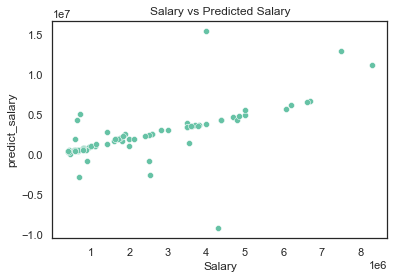

In [326]:
seaborn.scatterplot(x = data['Salary'], y = data['predict_salary'])
pyplot.title('Salary vs Predicted Salary')
pyplot.show()

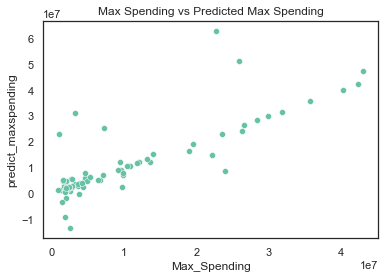

In [327]:
seaborn.scatterplot(x = data['Max_Spending'], y = data['predict_maxspending'])
pyplot.title('Max Spending vs Predicted Max Spending')
pyplot.show()

It is tough to tell due to varying scales of each axis, but results are possibly correlated. We will look more into the exact correlations later on.

Next, we will look at how different each of the predicted values were.

In [328]:
print('Distinct (Salary - Predicted Salary) for Salary Results')
print(set([data['Salary'][row] - data['predict_salary'][row] for row in data.index]))
print('MIN:', min([data['Salary'][row] - data['predict_salary'][row] for row in data.index]))
print('MAX:', max([data['Salary'][row] - data['predict_salary'][row] for row in data.index]))
print()
print('Distinct (Max Spending - Predicted Max Spending) for Max Spending Results')
print(set([data['Max_Spending'][row] - data['predict_maxspending'][row] for row in data.index]))
print('MIN:', min([data['Max_Spending'][row] - data['predict_maxspending'][row] for row in data.index]))
print('MAX:', max([data['Max_Spending'][row] - data['predict_maxspending'][row] for row in data.index]))

Distinct (Salary - Predicted Salary) for Salary Results
{-1.0728836059570312e-06, 2.2351741790771484e-08, 1.0132789611816406e-06, -1.30385160446167e-08, -1.9669532775878906e-06, -6.51925802230835e-09, -2.905726432800293e-06, 1.648440957069397e-07, -1.1026859283447266e-06, -6.705522537231445e-07, -7.450580596923828e-07, -2.8870999813079834e-08, 1.1548399925231934e-07, -3.3602118492126465e-06, -6.3478946685791016e-06, -7.599592208862305e-07, -1.7490237951278687e-06, 1.4901161193847656e-08, -1.4901161193847656e-08, 1.825392246246338e-07, -1.1175870895385742e-06, -1.6540288925170898e-06, 300069.45765731856, -1.1920928955078125e-07, 125477.41818862408, 185384.29687652813, -39887.23720227927, -170433.6000739094, -3743163.3621413447, -258482.39002725482, -1473455.2663861737, -68514.66166372225, 3471970.86756067, 894567.9475634955, -21894.163043021224, 10363.068018954247, -536454.0748880208, 39555.45472942293, 139397.3562887665, -677753.7016775906, 3233931.433243394, -3.67872416973114e-08, 134

Certainly quite different! Still not very promising for the model.

Now that data have been Obtained, Scrubbed, Explored, and Modeled, it is now time to iNterpret and complete thje OSEMN process! Seven qustions will be answered using the results from all above cells.

Question 1 - What is the recommended (predicted) salary and max spending for the Syracuse coach?

This is luckily easy to find due to how the prediction results were stored. Four column values from the row of data for Syracuse will be displayed. The "predict_salary" value will be the predicted salary and the "predict_maxspending" value will be the predicted max spending. Both of the actual values will be displayed as well.

In [329]:
#Question 1 - Predicted Syracuse Coach Salary and Max Spending
data[data.index == 'SYRACUSE'][['Salary', 'predict_salary', 'Max_Spending', 'predict_maxspending']]

,Salary,predict_salary,Max_Spending,predict_maxspending
SCHOOL,,,,
SYRACUSE,2401206,2401206.0,2401206,2401206.0


Question 2 - What is the recommended (predicted) salary and max spending for the Syracuse coach if Syracuse was in the Big Ten?

This is lather, rinse, repeat with Question 1, but an important step is needed first. A new model will need to be created where Syracuse is in the Big Ten instead of the ACC. Then, the model function used earlier will be used again to get another set of results. Once the new predictions are generated, it truly is the same process as Question 1.

In [330]:
#Question 2 - Predicted Syracuse Coach Salary if in Big Ten
q2_data = pandas.DataFrame(data)

q2_data = q2_data.drop(columns = ['predict_salary', 'predict_maxspending'])

q2_data['Conference'] = ['Big Ten' if row == 'SYRACUSE' else q2_data['Conference'][row] for row in q2_data.index]

q2_data = model(q2_data, ['Graduation_Rate', 'Conference', 'Power_5', 'WinLoss_Rank_2022', 'Wins_2022', 'Losses_2022', 'Win_Percentage_2022'])

q2_data[q2_data.index == 'SYRACUSE'][['Salary', 'predict_salary', 'Max_Spending', 'predict_maxspending']]


,Salary,predict_salary,Max_Spending,predict_maxspending
SCHOOL,,,,
SYRACUSE,2401206,2.481826e+06,2401206,2.246812e+06


Question 3 - What is the recommended (predicted) salary and max spending for the Syracuse coach if Syracuse was in the Big East?

The process of answering this is very much like that of Question 2, but this time "Power 5" will be changed from "Power 5" to "Non-Power 5". This is becasue the model does not have any training data on the Big East conference and this is the closest way of working around that problem.

In [331]:
#Question 3 - Predicted Syracuse Coach Salary if in Big East
q3_data = pandas.DataFrame(data)

q3_data = q3_data.drop(columns = ['predict_salary', 'predict_maxspending'])

q3_data['Conference'] = ['Non-Power 5' if row == 'SYRACUSE' else q2_data['Power_5'][row] for row in q2_data.index]

q3_data = model(q3_data, ['Graduation_Rate', 'Conference', 'Power_5', 'WinLoss_Rank_2022', 'Wins_2022', 'Losses_2022', 'Win_Percentage_2022'])

q3_data[q3_data.index == 'SYRACUSE'][['Salary', 'predict_salary', 'Max_Spending', 'predict_maxspending']]

,Salary,predict_salary,Max_Spending,predict_maxspending
SCHOOL,,,,
SYRACUSE,2401206,2401206.0,2401206,2401206.0


Question 4 - What schools were dropped from the data and why?

This question was essentially answered earlier during the data obaining and scrubbing, but the only schools that were dropped were ones that either had a salary of 0 or did not have matches in the graduation rate and win/loss data that were joined in. Most of these mismatched are likley to be due to formatting / verbiage differences, as was seen in man yexamples that needed to be cleaned before they had a match. The number of schools dropped, percentage of schools dropped, and names of schools dropped will all be displayed below.

In [332]:
#Question 4 - Schools dropped from data
print('Number of Schools in Original Coaches Data:', len(coaches_data['School']))

dropped_schools = pandas.DataFrame([coaches_data['School'][index] for index in coaches_data.index if not coaches_data['SCHOOL'][index] in data.index], columns = ['School'])
print('Number of Schools in Final Data:', len(data.index), '({:,.1%})'.format(len(data.index) / len(coaches_data['School'])))

print('Number of Schools Dropped from Original Data:', len(coaches_data['School']) - len(data.index), '({:,.1%})'.format((len(coaches_data['School']) - len(data.index)) / len(coaches_data['School'])))
print()

print('Dropped Schools')
dropped_schools


Number of Schools in Original Coaches Data: 129
Number of Schools in Final Data: 78 (60.5%)
Number of Schools Dropped from Original Data: 51 (39.5%)

Dropped Schools


,School
0,Air Force
1,Alabama at Birmingham
2,Arkansas
3,Army
4,Baylor
5,Bowling Green
6,Brigham Young
7,Buffalo
8,California
9,Central Florida


Question 5 - What effect did graduation rate have on Salary and on Max Spending?

Correlation analysis and scatterplots will be generated below to answer this question.

Correlation Coefficient for Graduation Rate and Salary 0.3775
MODERATE POSITIVE CORRELATION


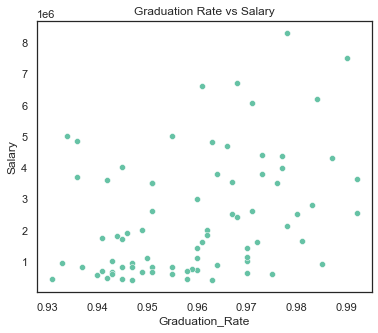

Correlation Coefficient for Graduation Rate and Max Spending 0.2351
WEAK POSITIVE CORRELATION


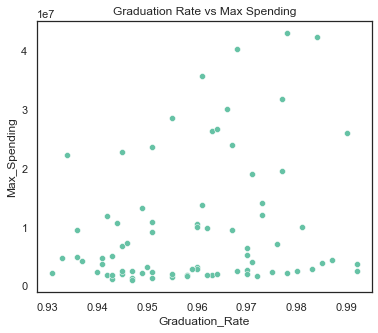

In [333]:
#Question 5 - Graduation Rate Effect on Salary and Max Spending

corr = round(data.Graduation_Rate.corr(data.Salary), 4)
print('Correlation Coefficient for Graduation Rate and Salary', corr)
if corr == -1: print('PERFECT NEGATIVE CORRELATION')
elif corr > -1 and corr <= -0.7: print('STRONG NEGATIVE CORRELATION')
elif corr > -0.7 and corr <= -0.3: print('MODERATE NEGATIVE CORRELATION')
elif corr > -0.3 and corr < 0: print('WEAK NEGATIVE CORRELATION')
elif corr == 0: print('TRUE ZERO CORRELATION')
elif corr > 0 and corr < 0.3: print('WEAK POSITIVE CORRELATION')
elif corr >= 0.3 and corr < 0.7: print('MODERATE POSITIVE CORRELATION')
elif corr >= 0.7 and corr < 1: print('STRONG POSITIVE CORRELATION')
elif corr == 1: print('PERFECT POSITIVE CORRELATION')

pyplot.figure().set_figheight(5)
seaborn.scatterplot(x = data.Graduation_Rate, y = data.Salary)
pyplot.title('Graduation Rate vs Salary')
pyplot.show()


corr = round(data.Graduation_Rate.corr(data.Max_Spending), 4)
print('Correlation Coefficient for Graduation Rate and Max Spending', corr)
if corr == -1: print('PERFECT NEGATIVE CORRELATION')
elif corr > -1 and corr <= -0.7: print('STRONG NEGATIVE CORRELATION')
elif corr > -0.7 and corr <= -0.3: print('MODERATE NEGATIVE CORRELATION')
elif corr > -0.3 and corr < 0: print('WEAK NEGATIVE CORRELATION')
elif corr == 0: print('TRUE ZERO CORRELATION')
elif corr > 0 and corr < 0.3: print('WEAK POSITIVE CORRELATION')
elif corr >= 0.3 and corr < 0.7: print('MODERATE POSITIVE CORRELATION')
elif corr >= 0.7 and corr < 1: print('STRONG POSITIVE CORRELATION')
elif corr == 1: print('PERFECT POSITIVE CORRELATION')

pyplot.figure().set_figheight(5)
seaborn.scatterplot(x = data.Graduation_Rate, y = data.Max_Spending)
pyplot.title('Graduation Rate vs Max Spending')
pyplot.show()

Question 6 - How good is the model?

While statistical measures are not used to answer this question, the number of predictions that match exactly, the number of predictions that are within $1,000, the number of matches that are within $1 Million, and the number of matches that are within $10 Million will be displayed below.

In [334]:
#Question 6 - How good is the model?

len_data = len(data.index)
salary_exacts = len([index for index in data.index if abs(data['Salary'][index] - data['predict_salary'][index]) == 0])
salary_within_1_thou = len([index for index in data.index if abs(data['Salary'][index] - data['predict_salary'][index]) < 1000])
salary_within_1_mil = len([index for index in data.index if abs(data['Salary'][index] - data['predict_salary'][index]) < 1000000])
salary_within_10_mil = len([index for index in data.index if abs(data['Salary'][index] - data['predict_salary'][index]) < 10000000])

maxspending_exacts = len([index for index in data.index if abs(data['Max_Spending'][index] - data['predict_maxspending'][index]) == 0])
maxspending_within_1_thou = len([index for index in data.index if abs(data['Max_Spending'][index] - data['predict_maxspending'][index]) < 1000])
maxspending_within_1_mil = len([index for index in data.index if abs(data['Max_Spending'][index] - data['predict_maxspending'][index]) < 1000000])
maxspending_within_10_mil = len([index for index in data.index if abs(data['Max_Spending'][index] - data['predict_maxspending'][index]) < 10000000])


print('MODEL ACCURACY SUMMARY')
print()
print()
print('Salary vs Predicted Salary')
print('Exact Matches:', '{:,.1%}'.format(salary_exacts / len_data))
print('Within $1,000:', '{:,.1%}'.format(salary_within_1_thou / len_data))
print('Within $1 Million:', '{:,.1%}'.format(salary_within_1_mil / len_data))
print('Within $10 Million:', '{:,.1%}'.format(salary_within_10_mil / len_data))
print()
print('Max Spending vs Predicted Max Spending')
print('Exact Matches:', '{:,.1%}'.format(maxspending_exacts / len_data))
print('Within $1,000:', '{:,.1%}'.format(maxspending_within_1_thou / len_data))
print('Within $1 Million:', '{:,.1%}'.format(maxspending_within_1_mil / len_data))
print('Within $10 Million:', '{:,.1%}'.format(maxspending_within_10_mil / len_data))

MODEL ACCURACY SUMMARY


Salary vs Predicted Salary
Exact Matches: 0.0%
Within $1,000: 32.1%
Within $1 Million: 83.3%
Within $10 Million: 97.4%

Max Spending vs Predicted Max Spending
Exact Matches: 0.0%
Within $1,000: 32.1%
Within $1 Million: 53.8%
Within $10 Million: 89.7%


Question 7 - Which feature had the biggest impact on Salary and on Max Spending?

Another corelation analysis will be done with all variables against both Salary and Max Spending. Conference and Power 5 will need to be converted to numerical fields in order for this to work. That said, it does not make any sense to make Conference a meaningful numerical variable, so it will be left out of the analysis in hopes that Power 5 will somewhat account for Conference as well. For Power 5, it will simply go back to its original form of being either 0 or 1 (1 being Power 5 and 0 being Non-Power 5). The best correlation for each (excluding Salary, Max Spending, predict_salary, and predict_maxspending) will be further analyzed and put on a scatter plot.

In [335]:
#Question 7 - Biggest impact on Salary and Max Spending

#Create DataFrame for correlation analysis without Conference column 
corr_data = data.drop(columns = ['Conference'])

#Transform Power 5 back to numerical
corr_data['Power_5'] = [float(1) if corr_data['Power_5'][row] == 'Power 5' else float(0) for row in corr_data.index]

#Create lists of correlations
salary_corrs = [['Salary and ' + column, round(corr_data['Salary'].corr(corr_data[column]),4)] for column in corr_data.columns]
maxspending_corrs = [['Max_Spending and ' + column, round(corr_data['Max_Spending'].corr(corr_data[column]),4)] for column in corr_data.columns]

#Print results
print('SALARY CORRELATION ANALYSIS')
for corr in salary_corrs: print(corr[0], '-----', corr[1])
print()
print('MAX SPENDING CORRELATION ANALYSIS')
for corr in maxspending_corrs: print(corr[0], '-----', corr[1])

SALARY CORRELATION ANALYSIS
Salary and Graduation_Rate ----- 0.3775
Salary and Power_5 ----- 0.7856
Salary and Salary ----- 1.0
Salary and Max_Spending ----- 0.8494
Salary and WinLoss_Rank_2022 ----- -0.2215
Salary and Wins_2022 ----- 0.3476
Salary and Losses_2022 ----- -0.3524
Salary and Win_Percentage_2022 ----- 0.2145
Salary and predict_salary ----- 0.6529
Salary and predict_maxspending ----- 0.7192

MAX SPENDING CORRELATION ANALYSIS
Max_Spending and Graduation_Rate ----- 0.2351
Max_Spending and Power_5 ----- 0.6034
Max_Spending and Salary ----- 0.8494
Max_Spending and Max_Spending ----- 1.0
Max_Spending and WinLoss_Rank_2022 ----- -0.1246
Max_Spending and Wins_2022 ----- 0.3033
Max_Spending and Losses_2022 ----- -0.3264
Max_Spending and Win_Percentage_2022 ----- 0.1641
Max_Spending and predict_salary ----- 0.6609
Max_Spending and predict_maxspending ----- 0.8267


STRONGEST CORRELATION FOR SALARY
Correlation Coefficient for Power_5 and Salary: 0.7856
STRONG POSITIVE CORRELATION


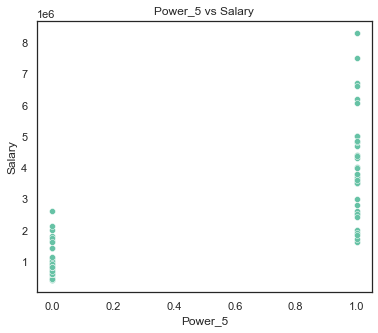



STRONGEST CORRELATION FOR MAX SPENDING
Correlation Coefficient for Power_5 and Max Spending: 0.6034
MODERATE POSITIVE CORRELATION


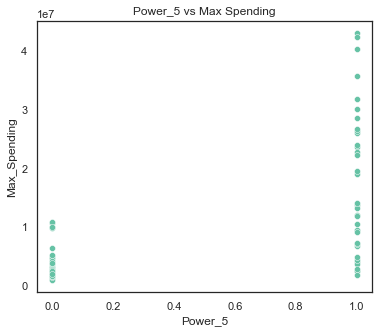

In [336]:
#Find strongest correlation, then see which column(s) are best and make a scatterplo tfor them
max_salary_corr = max([abs(corr[1]) for corr in salary_corrs if not corr[0].split()[-1] in ('Salary', 'Max_Spending', 'predict_salary', 'predict_maxspending')])
best_salary_corr_cols = [corr[0].split()[-1] for corr in salary_corrs if abs(corr[1]) == max_salary_corr]
max_maxspending_corr = max([abs(corr[1]) for corr in maxspending_corrs if not corr[0].split()[-1] in ('Salary', 'Max_Spending', 'predict_salary', 'predict_maxspending')])
best_maxspending_corr_cols = [corr[0].split()[-1] for corr in maxspending_corrs if abs(corr[1]) == max_maxspending_corr]

print('STRONGEST CORRELATION FOR SALARY')
for col in best_salary_corr_cols:
    corr = round(corr_data[col].corr(corr_data.Salary), 4)
    print('Correlation Coefficient for', col, 'and Salary:', corr)
    if corr == -1: print('PERFECT NEGATIVE CORRELATION')
    elif corr > -1 and corr <= -0.7: print('STRONG NEGATIVE CORRELATION')
    elif corr > -0.7 and corr <= -0.3: print('MODERATE NEGATIVE CORRELATION')
    elif corr > -0.3 and corr < 0: print('WEAK NEGATIVE CORRELATION')
    elif corr == 0: print('TRUE ZERO CORRELATION')
    elif corr > 0 and corr < 0.3: print('WEAK POSITIVE CORRELATION')
    elif corr >= 0.3 and corr < 0.7: print('MODERATE POSITIVE CORRELATION')
    elif corr >= 0.7 and corr < 1: print('STRONG POSITIVE CORRELATION')
    elif corr == 1: print('PERFECT POSITIVE CORRELATION')

    pyplot.figure().set_figheight(5)
    seaborn.scatterplot(x = corr_data[col], y = corr_data.Salary)
    pyplot.title(col + ' vs Salary')
    pyplot.show()


print()
print()
print('STRONGEST CORRELATION FOR MAX SPENDING')
for col in best_maxspending_corr_cols:
    corr = round(corr_data[col].corr(corr_data.Max_Spending), 4)
    print('Correlation Coefficient for', col, 'and Max Spending:', corr)
    if corr == -1: print('PERFECT NEGATIVE CORRELATION')
    elif corr > -1 and corr <= -0.7: print('STRONG NEGATIVE CORRELATION')
    elif corr > -0.7 and corr <= -0.3: print('MODERATE NEGATIVE CORRELATION')
    elif corr > -0.3 and corr < 0: print('WEAK NEGATIVE CORRELATION')
    elif corr == 0: print('TRUE ZERO CORRELATION')
    elif corr > 0 and corr < 0.3: print('WEAK POSITIVE CORRELATION')
    elif corr >= 0.3 and corr < 0.7: print('MODERATE POSITIVE CORRELATION')
    elif corr >= 0.7 and corr < 1: print('STRONG POSITIVE CORRELATION')
    elif corr == 1: print('PERFECT POSITIVE CORRELATION')

    pyplot.figure().set_figheight(5)
    seaborn.scatterplot(x = corr_data[col], y = corr_data.Max_Spending)
    pyplot.title(col + ' vs Max Spending')
    pyplot.show()

END OF LAB 1.